### Iris flower classification

In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt


# import test - train functions
from sklearn.model_selection import train_test_split,KFold,cross_val_score

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # suppport vector machine
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Importing iris dataset
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)

df #Input variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
target= pd.DataFrame(iris.target)
target # target variables

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
fulldf = df
fulldf['target'] = iris.target
fulldf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# Flowerwise separation
df0 = fulldf[fulldf.target==0]
df1 = fulldf[fulldf.target==1]
df2 = fulldf[fulldf.target==2]

In [21]:
import matplotlib.patches as mpatches

<Figure size 1080x1080 with 0 Axes>

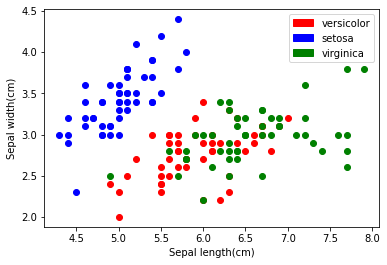

<Figure size 1080x1080 with 0 Axes>

In [26]:
blue_patch = mpatches.Patch(color='blue', label='setosa')
red_patch = mpatches.Patch(color='red', label='versicolor')
green_patch = mpatches.Patch(color='green', label='virginica')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green')
plt.xlabel("Sepal length(cm)")
plt.ylabel("Sepal width(cm)")
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

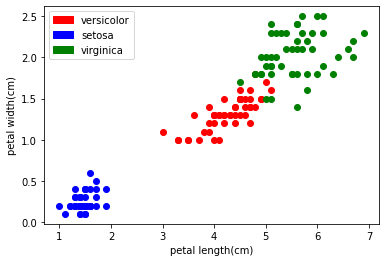

<Figure size 1080x1080 with 0 Axes>

In [29]:
blue_patch = mpatches.Patch(color='blue', label='setosa')
red_patch = mpatches.Patch(color='red', label='versicolor')
green_patch = mpatches.Patch(color='green', label='virginica')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")
plt.figure(figsize=(15,15))

Test-Train-Split method

In [56]:
# Test_Train_Split Method
X_train , x_test , Y_Train , y_test = train_test_split(df,iris.target,test_size=0.2)

In [57]:
print("Training size=",len(X_train))
print("Testing size=",len(x_test))

Training size= 120
Testing size= 30


In [58]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train,Y_Train)
svm_score = svm.score(x_test,y_test)
print(svm_score)

1.0


In [59]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_Train)
rfc_score = rfc.score(x_test,y_test)
print(rfc_score)

1.0


In [60]:
lr = LogisticRegression()
lr.fit(X_train,Y_Train)
lr_score = lr.score(x_test,y_test)
print(lr_score)


1.0


K Fold Cross Validation

In [65]:
LR_SCORE = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=400),df,iris.target)
LR_SCORE

array([1., 1., 1., 1., 1.])

In [67]:
SVM_SCORE =cross_val_score(SVC(),df,iris.target)
SVM_SCORE

array([1., 1., 1., 1., 1.])

In [69]:
RF_SCORE = cross_val_score(RandomForestClassifier(),df,iris.target)
RF_SCORE

array([1., 1., 1., 1., 1.])

In [71]:
print("Averge Score of Logistic Regression=",sum(LR_SCORE)/len(LR_SCORE))
print("Averge Score of SVM=",sum(SVM_SCORE)/len(SVM_SCORE))
print("Averge Score of Random forest=",sum(RF_SCORE)/len(RF_SCORE))

Averge Score of Logistic Regression= 1.0
Averge Score of SVM= 1.0
Averge Score of Random forest= 1.0
